In [39]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [51]:
FILE_PATH = 'pilot1.json'

import ast

all_entries = []
with open(FILE_PATH) as file:
    all_entries = json.loads(file.read(), strict=False)


In [52]:
cond1_start, cond2_start, cond3_start, cond4_start = [], [], [], []
cond1_finish, cond2_finish, cond3_finish, cond4_finish = [], [], [], []
starts = [cond1_start, cond2_start, cond3_start, cond4_start]
finishes = [cond1_finish, cond2_finish, cond3_finish, cond4_finish]

for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']
        finishes[condition].append(entry)

print(len(cond1_finish), len(cond2_finish), len(cond3_finish), len(cond4_finish))

26 30 25 39


In [53]:
cond1_aha, cond1_correct = [], [] #final ratings for the last anagram
cond2_aha, cond2_correct = [], []
cond3_aha, cond3_correct = [], []
cond4_aha, cond4_correct = [], []

cond1_correct1, cond1_correct2, cond1_correct3, cond1_correct4 = [], [], [],[]
cond2_correct1, cond2_correct2, cond2_correct3, cond2_correct4 = [], [], [],[]
cond3_correct1, cond3_correct2, cond3_correct3, cond3_correct4 = [], [], [],[]
cond4_correct1, cond4_correct2, cond4_correct3, cond4_correct4 = [], [], [],[]

cond1_aha1, cond1_aha2, cond1_aha3, cond1_aha4 = [], [], [],[]
cond2_aha1, cond2_aha2, cond2_aha3, cond2_aha4 = [], [], [],[]
cond3_aha1, cond3_aha2, cond3_aha3, cond3_aha4 = [], [], [],[]
cond4_aha1, cond4_aha2, cond4_aha3, cond4_aha4 = [], [], [],[]

cond1_stimulus = []
cond2_stimulus = []
cond3_stimulus = []
cond4_stimulus = []

test_stimulus_cond1 = []
test_stimulus_cond2 = []
test_stimulus_cond3 = []
test_stimulus_cond4 = []

for entry in cond1_finish:
    entry_data = entry['data']
    #collect pleasantness ratings
    cond1_stimulus.append(entry_data[4]['stimulus'])
    r1 = entry_data[5]['responses'] #get people's solution rating here
    cond1_correct1.append(int(r1[6]))
    
    r2 = entry_data[9]['responses']
    cond1_correct2.append(int(r2[6]))
    cond1_stimulus.append(entry_data[8]['stimulus'])
    
    r3 = entry_data[13]['responses'] 
    cond1_correct3.append(int(r3[6]))
    cond1_stimulus.append(entry_data[12]['stimulus'])
    
    r4 = entry_data[17]['responses'] 
    cond1_correct4.append(int(r4[6]))
    cond1_stimulus.append(entry_data[16]['stimulus'])
    
    r5 = entry_data[21]['responses'] #pleasant response here
    cond1_correct.append(int(r5[6]))

    a = True
    #collect aha ratings
    b = int(r1[6])+int(r2[6])+int(r3[6])+int(r4[6]) #how many responses did people get correctly?
    #if b == 2 and int(r5[6]) == 1:
    r = entry_data[6]['responses'] #get people's aha rating here
    cond1_aha1.append(int(r[6]))

    r = entry_data[10]['responses']
    cond1_aha2.append(int(r[6]))

    r = entry_data[14]['responses'] 
    cond1_aha3.append(int(r[6]))

    r = entry_data[18]['responses'] 
    cond1_aha4.append(int(r[6]))

    rating = entry_data[22]['responses'] #aha response here
    cond1_aha.append(rating[6])
    test_stimulus_cond1.append(entry_data[20]['stimulus'])

for entry in cond2_finish:
    entry_data = entry['data']
    #collect pleasantness ratings
    cond2_stimulus.append(entry_data[4]['stimulus'])
    r1 = entry_data[5]['responses'] #get people's solution rating here
    cond2_correct1.append(int(r1[6]))
    
    r2 = entry_data[9]['responses']
    cond2_correct2.append(int(r2[6]))
    cond2_stimulus.append(entry_data[8]['stimulus'])
    
    r3 = entry_data[13]['responses'] 
    cond2_correct3.append(int(r3[6]))
    cond2_stimulus.append(entry_data[12]['stimulus'])
    
    r4 = entry_data[17]['responses'] 
    cond2_correct4.append(int(r4[6]))
    cond2_stimulus.append(entry_data[16]['stimulus'])
    
    r5 = entry_data[21]['responses'] #pleasant response here
    cond2_correct.append(int(r5[6]))

    a = True
    #collect aha ratings
    b = int(r1[6])+int(r2[6])+int(r3[6])+int(r4[6]) #how many responses did people get correctly?
    #if b == 2 and int(r5[6]) == 1:
    r = entry_data[6]['responses'] #get people's aha rating here
    cond2_aha1.append(int(r[6]))

    r = entry_data[10]['responses']
    cond2_aha2.append(int(r[6]))

    r = entry_data[14]['responses'] 
    cond2_aha3.append(int(r[6]))

    r = entry_data[18]['responses'] 
    cond2_aha4.append(int(r[6]))

    rating = entry_data[22]['responses'] #aha response here
    cond2_aha.append(rating[6])
    test_stimulus_cond2.append(entry_data[20]['stimulus'])
            
for entry in cond3_finish:
    entry_data = entry['data']
    #collect pleasantness ratings
    cond3_stimulus.append(entry_data[4]['stimulus'])
    r1 = entry_data[5]['responses'] #get people's solution rating here
    cond3_correct1.append(int(r1[6]))
    
    r2 = entry_data[9]['responses']
    cond3_correct2.append(int(r2[6]))
    cond3_stimulus.append(entry_data[8]['stimulus'])
    
    r3 = entry_data[13]['responses'] 
    cond3_correct3.append(int(r3[6]))
    cond3_stimulus.append(entry_data[12]['stimulus'])
    
    r4 = entry_data[17]['responses'] 
    cond3_correct4.append(int(r4[6]))
    cond3_stimulus.append(entry_data[16]['stimulus'])
    
    r5 = entry_data[21]['responses'] #pleasant response here
    cond3_correct.append(int(r5[6]))

    a = True
    #collect aha ratings
    b = int(r1[6])+int(r2[6])+int(r3[6])+int(r4[6]) #how many responses did people get correctly?
    #if b == 2 and int(r5[6]) == 1:
    r = entry_data[6]['responses'] #get people's aha rating here
    cond3_aha1.append(int(r[6]))

    r = entry_data[10]['responses']
    cond3_aha2.append(int(r[6]))

    r = entry_data[14]['responses'] 
    cond3_aha3.append(int(r[6]))

    r = entry_data[18]['responses'] 
    cond3_aha4.append(int(r[6]))

    rating = entry_data[22]['responses'] #aha response here
    cond3_aha.append(rating[6])
    test_stimulus_cond3.append(entry_data[20]['stimulus'])

for entry in cond4_finish:
    entry_data = entry['data']
    #collect pleasantness ratings
    cond4_stimulus.append(entry_data[4]['stimulus'])
    r1 = entry_data[5]['responses'] #get people's solution rating here
    cond4_correct1.append(int(r1[6]))
    
    r2 = entry_data[9]['responses']
    cond4_correct2.append(int(r2[6]))
    cond4_stimulus.append(entry_data[8]['stimulus'])
    
    r3 = entry_data[13]['responses'] 
    cond4_correct3.append(int(r3[6]))
    cond4_stimulus.append(entry_data[12]['stimulus'])
    
    r4 = entry_data[17]['responses'] 
    cond4_correct4.append(int(r4[6]))
    cond4_stimulus.append(entry_data[16]['stimulus'])
    
    r5 = entry_data[21]['responses'] #pleasant response here
    cond4_correct.append(int(r5[6]))

    a = True
    #collect aha ratings
    b = int(r1[6])+int(r2[6])+int(r3[6])+int(r4[6]) #how many responses did people get correctly?
    #if b == 2 and int(r5[6]) == 1:
    r = entry_data[6]['responses'] #get people's aha rating here
    cond4_aha1.append(int(r[6]))

    r = entry_data[10]['responses']
    cond4_aha2.append(int(r[6]))

    r = entry_data[14]['responses'] 
    cond4_aha3.append(int(r[6]))

    r = entry_data[18]['responses'] 
    cond4_aha4.append(int(r[6]))

    rating = entry_data[22]['responses'] #aha response here
    cond4_aha.append(rating[6])
    test_stimulus_cond4.append(entry_data[20]['stimulus'])
        
def clean(values):
    return [int(value)+1 for value in values]

cond1_aha = clean(cond1_aha)
cond2_aha = clean(cond2_aha)
cond3_aha = clean(cond3_aha)
cond4_aha= clean(cond4_aha)
          
print(len(cond1_aha), len(cond2_aha), len(cond3_aha), len(cond4_aha))

26 30 25 39


In [54]:
#analyze which cond1 stimulus generated more aha
cond1_ahas = cond1_aha1+cond1_aha2+cond1_aha3+cond1_aha4
cond1_corrects = cond1_correct1+cond1_correct2+cond1_correct3+cond1_correct4

d = {'anagrams': cond1_stimulus, 'ahas': cond1_ahas, 'solved': cond1_corrects}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas,solved
anagrams,,
"<blockquote>\n <h1 id=""betl"">BETL</h1>\n <p><br></p>\n</blockquote>",1.157895,0.842105
"<blockquote>\n <h1 id=""codl"">CODL</h1>\n <p><br></p>\n</blockquote>",3.000000,0.952381
"<blockquote>\n <h1 id=""fidn"">FIDN</h1>\n <p><br></p>\n</blockquote>",2.375000,0.916667
"<blockquote>\n <h1 id=""fodo"">FODO</h1>\n <p><br></p>\n</blockquote>",2.190476,0.952381
"<blockquote>\n <h1 id=""pitn"">PITN</h1>\n <p><br></p>\n</blockquote>",2.631579,1.000000


In [55]:
#analyze which cond2 stimulus generated more aha
cond2_ahas = cond2_aha1+cond2_aha2+cond2_aha3+cond2_aha4
cond2_corrects = cond2_correct1+cond2_correct2+cond2_correct3+cond2_correct4

d = {'anagrams': cond2_stimulus, 'ahas': cond2_ahas, 'solved': cond2_corrects}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas,solved
anagrams,,
"<blockquote>\n <h1 id=""betl"">BETL</h1>\n <p><br></p>\n</blockquote>",2.500000,0.928571
"<blockquote>\n <h1 id=""codl"">CODL</h1>\n <p><br></p>\n</blockquote>",2.920000,0.960000
"<blockquote>\n <h1 id=""fidn"">FIDN</h1>\n <p><br></p>\n</blockquote>",3.080000,0.960000
"<blockquote>\n <h1 id=""fodo"">FODO</h1>\n <p><br></p>\n</blockquote>",2.650000,0.950000
"<blockquote>\n <h1 id=""pitn"">PITN</h1>\n <p><br></p>\n</blockquote>",1.727273,0.954545


In [56]:
#analyze which cond3 stimulus generated more aha
cond3_ahas = cond3_aha1+cond3_aha2+cond3_aha3+cond3_aha4
cond3_corrects = cond3_correct1+cond3_correct2+cond3_correct3+cond3_correct4

d = {'anagrams': cond3_stimulus, 'ahas': cond3_ahas, 'solved': cond3_corrects}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas,solved
anagrams,,
"<blockquote>\n <h1 id=""aneplix"">ANEPLIX</h1>\n <p><br></p>\n</blockquote>",1.380952,0.238095
"<blockquote>\n <h1 id=""eurndf"">EURNDF</h1>\n <p><br></p>\n</blockquote>",1.450000,0.300000
"<blockquote>\n <h1 id=""hnatuyg"">HNATUYG</h1>\n <p><br></p>\n</blockquote>",0.739130,0.130435
"<blockquote>\n <h1 id=""iocnrag"">IOCNRAG</h1>\n <p><br></p>\n</blockquote>",0.375000,0.125000
"<blockquote>\n <h1 id=""udalrbe"">UDALRBE</h1>\n <p><br></p>\n</blockquote>",0.850000,0.250000


In [57]:
#analyze which cond4 stimulus generated more aha
cond4_ahas = cond4_aha1+cond4_aha2+cond4_aha3+cond4_aha4
cond4_corrects = cond4_correct1+cond4_correct2+cond4_correct3+cond4_correct4

d = {'anagrams': cond4_stimulus, 'ahas': cond4_ahas, 'solved': cond4_corrects}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas,solved
anagrams,,
"<blockquote>\n <h1 id=""aneplix"">ANEPLIX</h1>\n <p><br></p>\n</blockquote>",0.827586,0.137931
"<blockquote>\n <h1 id=""eurndf"">EURNDF</h1>\n <p><br></p>\n</blockquote>",0.433333,0.100000
"<blockquote>\n <h1 id=""hnatuyg"">HNATUYG</h1>\n <p><br></p>\n</blockquote>",0.750000,0.218750
"<blockquote>\n <h1 id=""iocnrag"">IOCNRAG</h1>\n <p><br></p>\n</blockquote>",0.875000,0.218750
"<blockquote>\n <h1 id=""udalrbe"">UDALRBE</h1>\n <p><br></p>\n</blockquote>",0.606061,0.121212


In [58]:
#analyze if there is any item effect on the last anagram for cond1
d = {'anagrams': test_stimulus_cond1, 'ahas': cond1_aha}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",2.222222
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",4.000000
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",3.800000
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",2.800000
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",3.800000


In [59]:
#analyze if there is any item effect on the last anagram for cond1
d = {'anagrams': test_stimulus_cond2, 'ahas': cond2_aha}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",3.428571
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",1.000000
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",3.857143
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",2.833333
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",3.222222


In [60]:
#analyze if there is any item effect on the last anagram for cond1
d = {'anagrams': test_stimulus_cond3, 'ahas': cond3_aha}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",3.571429
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",3.600000
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",3.750000
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",5.600000
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",4.500000


In [61]:
#analyze if there is any item effect on the last anagram for cond1
d = {'anagrams': test_stimulus_cond4, 'ahas': cond4_aha}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",5.500000
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",4.500000
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",4.142857
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",3.888889
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",3.636364


/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


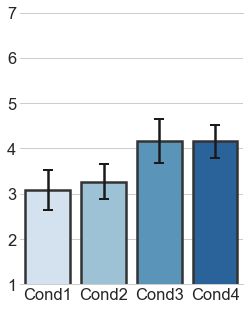

3.076923076923077 3.2666666666666666 4.16 4.153846153846154


In [62]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(4,5), 
                                              "grid.linewidth": 1, "axes.linewidth": 1, 
                                              })

cond1_aha_mean = np.mean(cond1_aha)
cond1_aha_error = stats.sem(cond1_aha)
cond2_aha_mean = np.mean(cond2_aha)
cond2_aha_error = stats.sem(cond2_aha)
cond3_aha_mean = np.mean(cond3_aha)
cond3_aha_error = stats.sem(cond3_aha)
cond4_aha_mean = np.mean(cond4_aha)
cond4_aha_error = stats.sem(cond4_aha)

ax = sns.barplot(
    np.arange(4), 
    [cond1_aha_mean, cond2_aha_mean, cond3_aha_mean, cond4_aha_mean],
    yerr=[cond1_aha_error, cond2_aha_error, cond3_aha_error, cond4_aha_error],
    palette="Blues", errcolor=".2", edgecolor=".2",linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)
plt.xticks(np.arange(4), ['Cond1','Cond2', 'Cond3', 'Cond4'])
#ax.set(ylabel='Mean Aha! rating on the test anagram')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([1,7]) 
sns.despine(ax=ax, left=True, top=False)
#plt.savefig('Aha_Exp2.png',dpi=1200)
plt.show()
print(cond1_aha_mean, cond2_aha_mean, cond3_aha_mean, cond4_aha_mean)$


In [27]:
t, p = ttest_ind(hard_aha, exp_aha)
print(t, p)

1.652746898942206 0.09942849291247485


In [25]:
test_stimulus = test_stimulus_easy+test_stimulus_hard
aha = exp_aha+hard_aha
a = [1] * len(test_stimulus_hard)
b = [0] * len(test_stimulus_easy)
condition = b + a


d = {'anagrams': test_stimulus_hard, 'ahas': hard_aha}
df1 = pd.DataFrame(data=d)

d = {'anagrams': test_stimulus_easy, 'ahas': exp_aha}
df2 = pd.DataFrame(data=d)

d = {'anagrams': test_stimulus, 'ahas': aha, 'condition': condition}
df = pd.DataFrame(data=d)

df2.groupby(['anagrams']).count()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",23
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",23
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",23
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",29
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",24


In [26]:
#mixed effects linear model to test effect of condition and item on Aha! rating
import statsmodels.api as sm
import statsmodels.formula.api as smf                                                                                               

mixed = smf.mixedlm("ahas ~ condition", df, groups=df["anagrams"])
mixed_fit = mixed.fit()
#print the summary
mixed_fit.summary()

C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2114: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2114: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: ahas     
No. Observations: 238     Method:             REML     
No. Groups:       5       Scale:              4.2916   
Min. group size:  42      Log-Likelihood:     -511.6826
Max. group size:  55      Converged:          No       
Mean group size:  47.6                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     3.623    0.191 18.934 0.000  3.248  3.998
condition     0.844    0.275  3.074 0.002  0.306  1.382
Group Var     0.007    0.165                           
=======================================================

"""

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


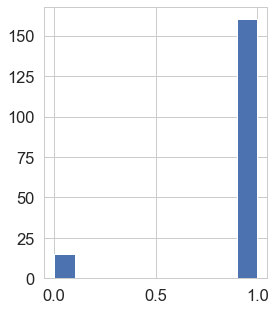

In [28]:
plt.hist(hard_pleasant)

print(hard_pleasant1)

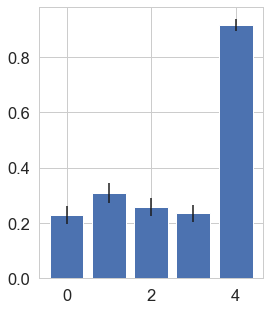

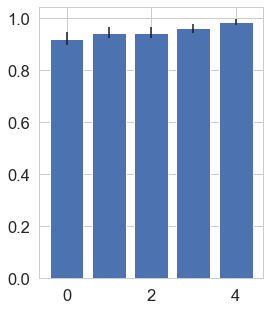

In [29]:
hard_pleasant_mean1 = np.mean(hard_pleasant1)
hard_pleasant_error1 = stats.sem(hard_pleasant1)
hard_pleasant_mean2 = np.mean(hard_pleasant2)
hard_pleasant_error2 = stats.sem(hard_pleasant2)
hard_pleasant_mean3 = np.mean(hard_pleasant3)
hard_pleasant_error3 = stats.sem(hard_pleasant3)
hard_pleasant_mean4 = np.mean(hard_pleasant4)
hard_pleasant_error4 = stats.sem(hard_pleasant4)
hard_pleasant_mean = np.mean(hard_pleasant) #final anagram
hard_pleasant_error = stats.sem(hard_pleasant)

plt.bar(
    np.arange(5),
    [hard_pleasant_mean1, hard_pleasant_mean2, hard_pleasant_mean3, hard_pleasant_mean4, hard_pleasant_mean],
    yerr=[hard_pleasant_error1, hard_pleasant_error2, hard_pleasant_error3, hard_pleasant_error4, hard_pleasant_error]
)
plt.show()

plt.figure(2)

exp_pleasant_mean1 = np.mean(exp_pleasant1)
exp_pleasant_error1 = stats.sem(exp_pleasant1)
exp_pleasant_mean2 = np.mean(exp_pleasant2)
exp_pleasant_error2 = stats.sem(exp_pleasant2)
exp_pleasant_mean3 = np.mean(exp_pleasant3)
exp_pleasant_error3 = stats.sem(exp_pleasant3)
exp_pleasant_mean4 = np.mean(exp_pleasant4)
exp_pleasant_error4 = stats.sem(exp_pleasant4)
exp_pleasant_mean = np.mean(exp_pleasant) #final anagram
exp_pleasant_error = stats.sem(exp_pleasant)

plt.bar(
    np.arange(5),
    [exp_pleasant_mean1, exp_pleasant_mean2, exp_pleasant_mean3, exp_pleasant_mean4, exp_pleasant_mean],
    yerr=[exp_pleasant_error1, exp_pleasant_error2, exp_pleasant_error3, exp_pleasant_error4, exp_pleasant_error]
)
plt.show()


/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


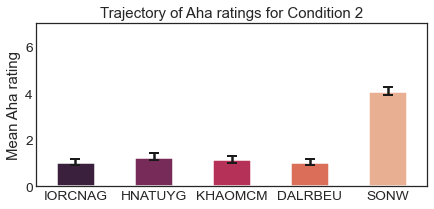

/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


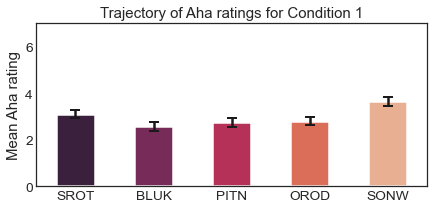

In [30]:
import seaborn as sns
sns.set(style="white", font_scale=1.25, rc={'figure.figsize':(7,3)})

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

hard_aha_mean1 = np.mean(hard_aha1)
hard_aha_error1 = stats.sem(hard_aha1)
hard_aha_mean2 = np.mean(hard_aha2)
hard_aha_error2 = stats.sem(hard_aha2)
hard_aha_mean3 = np.mean(hard_aha3)
hard_aha_error3 = stats.sem(hard_aha3)
hard_aha_mean4 = np.mean(hard_aha4)
hard_aha_error4 = stats.sem(hard_aha4)
hard_aha_mean = np.mean(hard_aha) #final anagram
hard_aha_error = stats.sem(hard_aha)

ax = sns.barplot(
    np.arange(5),
    [hard_aha_mean1, hard_aha_mean2, hard_aha_mean3, hard_aha_mean4, hard_aha_mean],
    yerr=[hard_aha_error1, hard_aha_error2, hard_aha_error3, hard_aha_error4, hard_aha_error],
    palette="rocket", linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)

plt.xticks(np.arange(5), ['IORCNAG','HNATUYG', 'KHAOMCM','DALRBEU','SONW'])
ax.set(title = 'Trajectory of Aha ratings for Condition 2', ylabel='Mean Aha rating')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([0,7]) 
change_width(ax, .5)
plt.show()

plt.figure(2)

exp_aha_mean1 = np.mean(exp_aha1)
exp_aha_error1 = stats.sem(exp_aha1)
exp_aha_mean2 = np.mean(exp_aha2)
exp_aha_error2 = stats.sem(exp_aha2)
exp_aha_mean3 = np.mean(exp_aha3)
exp_aha_error3 = stats.sem(exp_aha3)
exp_aha_mean4 = np.mean(exp_aha4)
exp_aha_error4 = stats.sem(exp_aha4)
exp_aha_mean = np.mean(exp_aha) #final anagram
exp_aha_error = stats.sem(exp_aha)

ax = sns.barplot(
    np.arange(5),
    [exp_aha_mean1, exp_aha_mean2, exp_aha_mean3, exp_aha_mean4, exp_aha_mean],
    yerr=[exp_aha_error1, exp_aha_error2, exp_aha_error3, exp_aha_error4, exp_aha_error],
    palette="rocket", linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)
plt.xticks(np.arange(5), ['SROT','BLUK', 'PITN','OROD','SONW'])
ax.set(title = 'Trajectory of Aha ratings for Condition 1', ylabel='Mean Aha rating')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([0,7]) 
change_width(ax, .5)
plt.show()
